In [1]:
import copy
import math
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.io as io
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import MDS

io.renderers.default='browser'

In [2]:
# CHANGE
path_directory = 'C:/Users/meyerp/Desktop/Rongo/soumission 2/code github'
os.chdir(path_directory)

- We load the alphabets.

In [3]:
alphabets = os.listdir("data/processed/alphabets/")
alphabets = sorted(alphabets)

print("Number of alphabets:", len(alphabets))
alphabets_short = copy.deepcopy(alphabets)
for i in range(len(alphabets)):
    alphabets_short[i] = alphabets[i][2:-4]

alphabets_short[alphabets_short.index('Ge_ez')] = "Ge`ez"

Number of alphabets: 51


- Distance functions

In [4]:
def closest_glyph_1(i, X_glyph, dict_dist_loc):
    l = [dict_dist_loc[(i,j)] for j in range(len(X_glyph))]
    return(min(l), np.argmin(l))

def closest_glyph_2(i, X_glyph, dict_dist_loc):
    l = [dict_dist_loc[(j,i)] for j in range(len(X_glyph))]
    return(min(l), np.argmin(l))

def similarity_between_languages_1(X_glyph_1, X_glyph_2, dict_dist_loc):
    l = []
    for i in range(len(X_glyph_1)):
        l.append(closest_glyph_1(i, X_glyph_2, dict_dist_loc)[0])
    return(np.mean(l))

def similarity_between_languages_2(X_glyph_1, X_glyph_2, dict_dist_loc):
    l = []
    for i in range(len(X_glyph_2)):
        l.append(closest_glyph_2(i, X_glyph_1, dict_dist_loc)[0])
    return(np.mean(l))

def similarity_between_languages(X_glyph_1, X_glyph_2, dict_dist_loc):
    sim_1 = similarity_between_languages_1(X_glyph_1, X_glyph_2, dict_dist_loc)
    sim_2 = similarity_between_languages_2(X_glyph_1, X_glyph_2, dict_dist_loc)
    return((sim_1+sim_2)/2)

- We create the dictionary of distances between the languages.

In [6]:
model_name = "siamese"
dict_dist={}
for i in range(len(alphabets)-1):
    for j in range(i+1,len(alphabets)):
        print(alphabets_short[i], alphabets_short[j])
        alphabet_1 = alphabets[i]
        alphabet_2 = alphabets[j]
        X_glyph_1 = np.load("data/processed/alphabets/"+alphabet_1)
        X_glyph_2 = np.load("data/processed/alphabets/"+alphabet_2)
        dictonary_alphabets = "dict_dist_X_"+alphabet_1[2:-4]+"_"+alphabet_2[2:-4]+"_"+model_name+".dat"
        dict_dist_loc = pickle.load(open("data/processed/distances/between_alphabets/"+dictonary_alphabets, "rb"))

        sim = similarity_between_languages(X_glyph_1, X_glyph_2, dict_dist_loc)
        dict_dist[(i,j)] = sim 
        print("similarity:", sim)

Arabic Armenian
similarity: 0.3971783740635465
Arabic Avestan
similarity: 0.41095136923137976
Arabic Carian
similarity: 0.4744803184848418
Arabic Caucasian Albanian
similarity: 0.25197462069204485
Arabic Chorasmian
similarity: 0.35256231348715134
Arabic Coptic
similarity: 0.46436941480212324
Arabic Cypriot
similarity: 0.38517986595527165
Arabic Cypro-Minoan
similarity: 0.3994549903506597
Arabic Cyrillic
similarity: 0.5073041235122623
Arabic Elder Futhark
similarity: 0.3763951948455239
Arabic Elymaic
similarity: 0.30120234962610404
Arabic Ge`ez
similarity: 0.4529937382836408
Arabic Georgian Asomtavruli
similarity: 0.4223513130990588
Arabic Georgian Mkhedruli
similarity: 0.45433706252317113
Arabic Glagolitic
similarity: 0.6350922194116406
Arabic Gothic
similarity: 0.44388305449616317
Arabic Greek
similarity: 0.44650101657074026
Arabic Hatran Aramaic
similarity: 0.38458139458770535
Arabic Hebrew
similarity: 0.3519988438550854
Arabic Imperial Aramaic
similarity: 0.39008031525022624
Arabic 

similarity: 0.22029363395688667
Caucasian Albanian Old North Arabian
similarity: 0.24419813459110384
Caucasian Albanian Old Permic
similarity: 0.26393665723702475
Caucasian Albanian Old Persian
similarity: 0.6254972558800103
Caucasian Albanian Old Sogdian
similarity: 0.11362825135469565
Caucasian Albanian Old South Arabian
similarity: 0.14630248664633744
Caucasian Albanian Old Turkic Orkhon
similarity: 0.16398457672716468
Caucasian Albanian Old Turkic Yenisei
similarity: 0.19667873093650373
Caucasian Albanian Pahlavi Inscriptional
similarity: 0.16464347639102264
Caucasian Albanian Pahlavi Psalter
similarity: 0.13283665605589876
Caucasian Albanian Palmyrene
similarity: 0.1031109306737033
Caucasian Albanian Parthian Inscriptional
similarity: 0.16331063303445187
Caucasian Albanian Phoenician
similarity: 0.23561037999864382
Caucasian Albanian Samaritan
similarity: 0.2786351142872867
Caucasian Albanian Sogdian
similarity: 0.23073182214129734
Caucasian Albanian Syriac
similarity: 0.293646648

similarity: 0.3655088846032718
Cyrillic Old Persian
similarity: 0.7829790048184198
Cyrillic Old Sogdian
similarity: 0.3908728897328173
Cyrillic Old South Arabian
similarity: 0.3939239117057852
Cyrillic Old Turkic Orkhon
similarity: 0.41830130751207306
Cyrillic Old Turkic Yenisei
similarity: 0.41988058960223207
Cyrillic Pahlavi Inscriptional
similarity: 0.3408980599351169
Cyrillic Pahlavi Psalter
similarity: 0.3781335547445729
Cyrillic Palmyrene
similarity: 0.3800524023497375
Cyrillic Parthian Inscriptional
similarity: 0.4725975525146747
Cyrillic Phoenician
similarity: 0.5366216099593493
Cyrillic Samaritan
similarity: 0.488080793288413
Cyrillic Sogdian
similarity: 0.49817225236310625
Cyrillic Syriac
similarity: 0.4825421098550858
Cyrillic Tifinagh
similarity: 0.3936485482807902
Cyrillic Ugaritic
similarity: 0.37193671633825337
Elder Futhark Elymaic
similarity: 0.24266292310362175
Elder Futhark Ge`ez
similarity: 0.23605547699098212
Elder Futhark Georgian Asomtavruli
similarity: 0.3231129

similarity: 0.3836404695587893
Gothic Old North Arabian
similarity: 0.38344790458612743
Gothic Old Permic
similarity: 0.4600891793711588
Gothic Old Persian
similarity: 0.7671284836277805
Gothic Old Sogdian
similarity: 0.33521502547578336
Gothic Old South Arabian
similarity: 0.382781661527129
Gothic Old Turkic Orkhon
similarity: 0.31888718821142836
Gothic Old Turkic Yenisei
similarity: 0.3773348329682237
Gothic Pahlavi Inscriptional
similarity: 0.41965009534918046
Gothic Pahlavi Psalter
similarity: 0.44747763195213064
Gothic Palmyrene
similarity: 0.28226959192919154
Gothic Parthian Inscriptional
similarity: 0.44432725923656513
Gothic Phoenician
similarity: 0.5228272186316274
Gothic Samaritan
similarity: 0.5507996451801084
Gothic Sogdian
similarity: 0.5425303472296773
Gothic Syriac
similarity: 0.4946476914707646
Gothic Tifinagh
similarity: 0.39204813162438745
Gothic Ugaritic
similarity: 0.382296897097841
Greek Hatran Aramaic
similarity: 0.3837605305275896
Greek Hebrew
similarity: 0.30619

similarity: 0.6541417180675173
Kharoshthi Old Sogdian
similarity: 0.10027219954732661
Kharoshthi Old South Arabian
similarity: 0.16762548124023607
Kharoshthi Old Turkic Orkhon
similarity: 0.16038430850259056
Kharoshthi Old Turkic Yenisei
similarity: 0.19981979650186266
Kharoshthi Pahlavi Inscriptional
similarity: 0.19238676306106692
Kharoshthi Pahlavi Psalter
similarity: 0.1776401127042534
Kharoshthi Palmyrene
similarity: 0.11814949602834207
Kharoshthi Parthian Inscriptional
similarity: 0.13742431190038784
Kharoshthi Phoenician
similarity: 0.20103780471430005
Kharoshthi Samaritan
similarity: 0.2820909418810974
Kharoshthi Sogdian
similarity: 0.2771114003444841
Kharoshthi Syriac
similarity: 0.3012264020258262
Kharoshthi Tifinagh
similarity: 0.3889369902336189
Kharoshthi Ugaritic
similarity: 0.14785565877450363
Latin Linear B
similarity: 0.29402984784697905
Latin Lycian
similarity: 0.19633878426365703
Latin Lydian
similarity: 0.37171264320540315
Latin Mandaic
similarity: 0.408378205658653

similarity: 0.2679937457904964
Old Hungarian Pahlavi Inscriptional
similarity: 0.40870092006277103
Old Hungarian Pahlavi Psalter
similarity: 0.28931280243048996
Old Hungarian Palmyrene
similarity: 0.2270992116898572
Old Hungarian Parthian Inscriptional
similarity: 0.28862728870186605
Old Hungarian Phoenician
similarity: 0.27876344791499724
Old Hungarian Samaritan
similarity: 0.4613989927975475
Old Hungarian Sogdian
similarity: 0.4752431565221723
Old Hungarian Syriac
similarity: 0.5092603156240515
Old Hungarian Tifinagh
similarity: 0.3414868781216673
Old Hungarian Ugaritic
similarity: 0.2971060223435166
Old Italic Old North Arabian
similarity: 0.3833051700499456
Old Italic Old Permic
similarity: 0.3015334384754612
Old Italic Old Persian
similarity: 0.8090196956583329
Old Italic Old Sogdian
similarity: 0.2650489056573456
Old Italic Old South Arabian
similarity: 0.3274219503619091
Old Italic Old Turkic Orkhon
similarity: 0.3048222890131973
Old Italic Old Turkic Yenisei
similarity: 0.37471

similarity: 0.1900945124325848
Samaritan Sogdian
similarity: 0.30849534741973594
Samaritan Syriac
similarity: 0.3384181460531728
Samaritan Tifinagh
similarity: 0.590619033083059
Samaritan Ugaritic
similarity: 0.30718828754300675
Sogdian Syriac
similarity: 0.26495748680625875
Sogdian Tifinagh
similarity: 0.4745579436823402
Sogdian Ugaritic
similarity: 0.20093804725749925
Syriac Tifinagh
similarity: 0.465148053576499
Syriac Ugaritic
similarity: 0.18305160343745508
Tifinagh Ugaritic
similarity: 0.4481064366497414


- Closest pairs

In [7]:
dict_dist_sorted = sorted(dict_dist.items(), key=lambda item: item[1], reverse=False)
for i in range(5):
    print(alphabets_short[dict_dist_sorted[i][0][0]], alphabets_short[dict_dist_sorted[i][0][1]], dict_dist_sorted[i][1])

Old Sogdian Pahlavi Psalter 0.050315434734026596
Meroitic Cursive Old Sogdian 0.05211353529658582
Old Sogdian Palmyrene 0.0780761768852455
Old Sogdian Parthian Inscriptional 0.07967480828966758
Nabataean Palmyrene 0.08095018444439138


- Furthest pairs

In [8]:
dict_dist_sorted=sorted(dict_dist.items(), key=lambda item: item[1], reverse=True)
for i in range(5):
    print(alphabets_short[dict_dist_sorted[i][0][0]], alphabets_short[dict_dist_sorted[i][0][1]], dict_dist_sorted[i][1])

Coptic Old Persian 0.8788309936049852
Glagolitic Old Persian 0.8562528030224285
Old Persian Tifinagh 0.8434708869464842
Old Italic Old Persian 0.8090196956583329
Greek Old Persian 0.7981803504518881


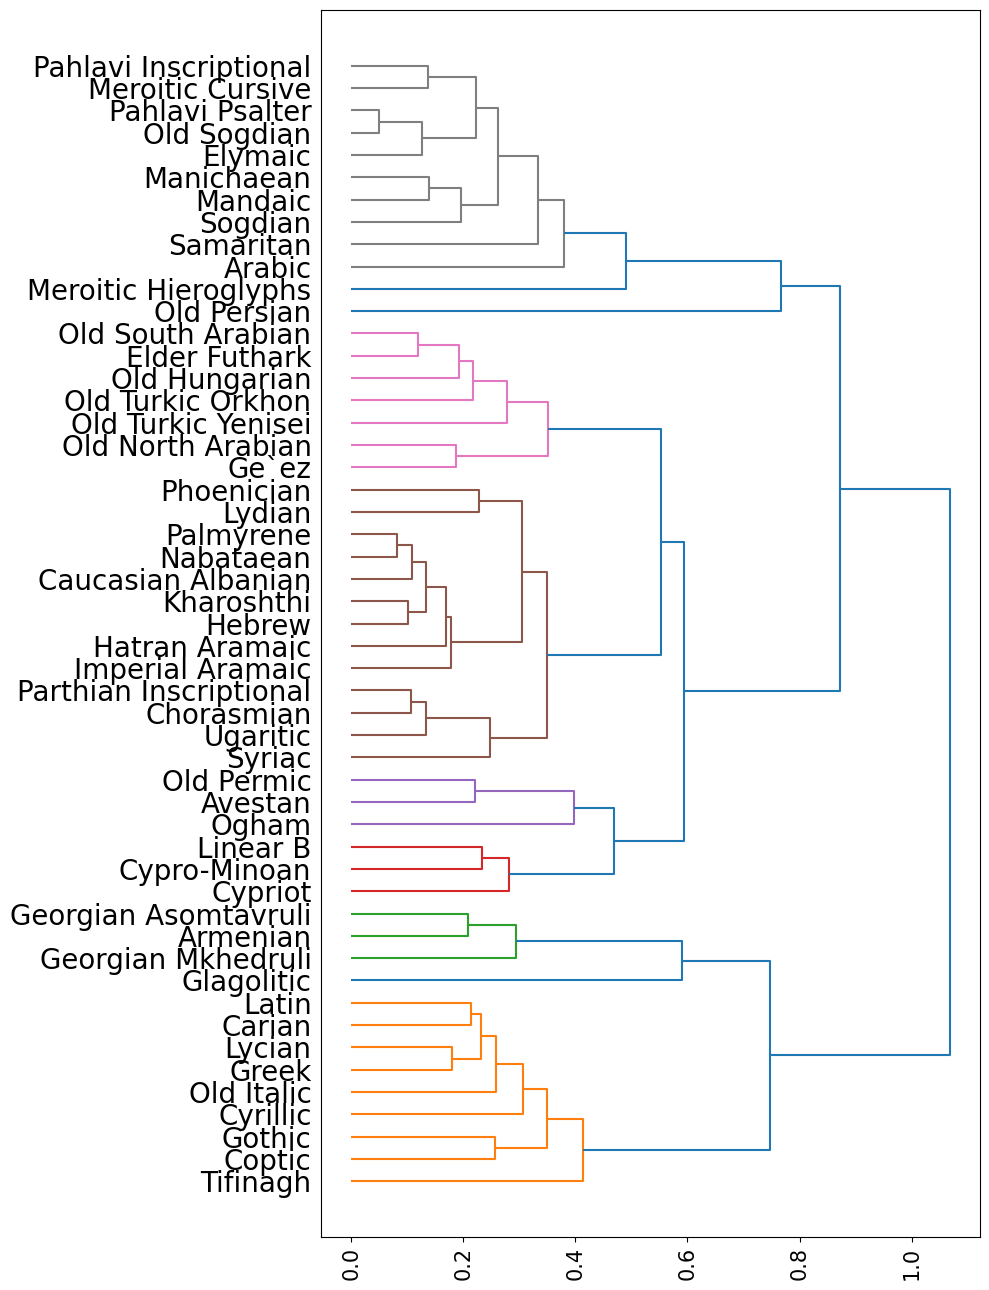

In [9]:
sorted_keys, distances = zip(*sorted(dict_dist.items()))
Z = linkage(distances, method='ward') #single, complete, average, weighted, centroid, median, ward

plt.rcParams["figure.figsize"] = [10,13] 
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dendrogram(Z, ax=ax, truncate_mode='lastp',p=100, show_contracted=True, labels=alphabets_short, color_threshold=0.45, orientation="right") # pour le nb d'individus par branche : show_contracted=True 

ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=20)  
ax.tick_params(axis='x', which='major', labelsize=15)   
plt.xticks(rotation = 90)
plt.autoscale()

plt.show()

- Elbow

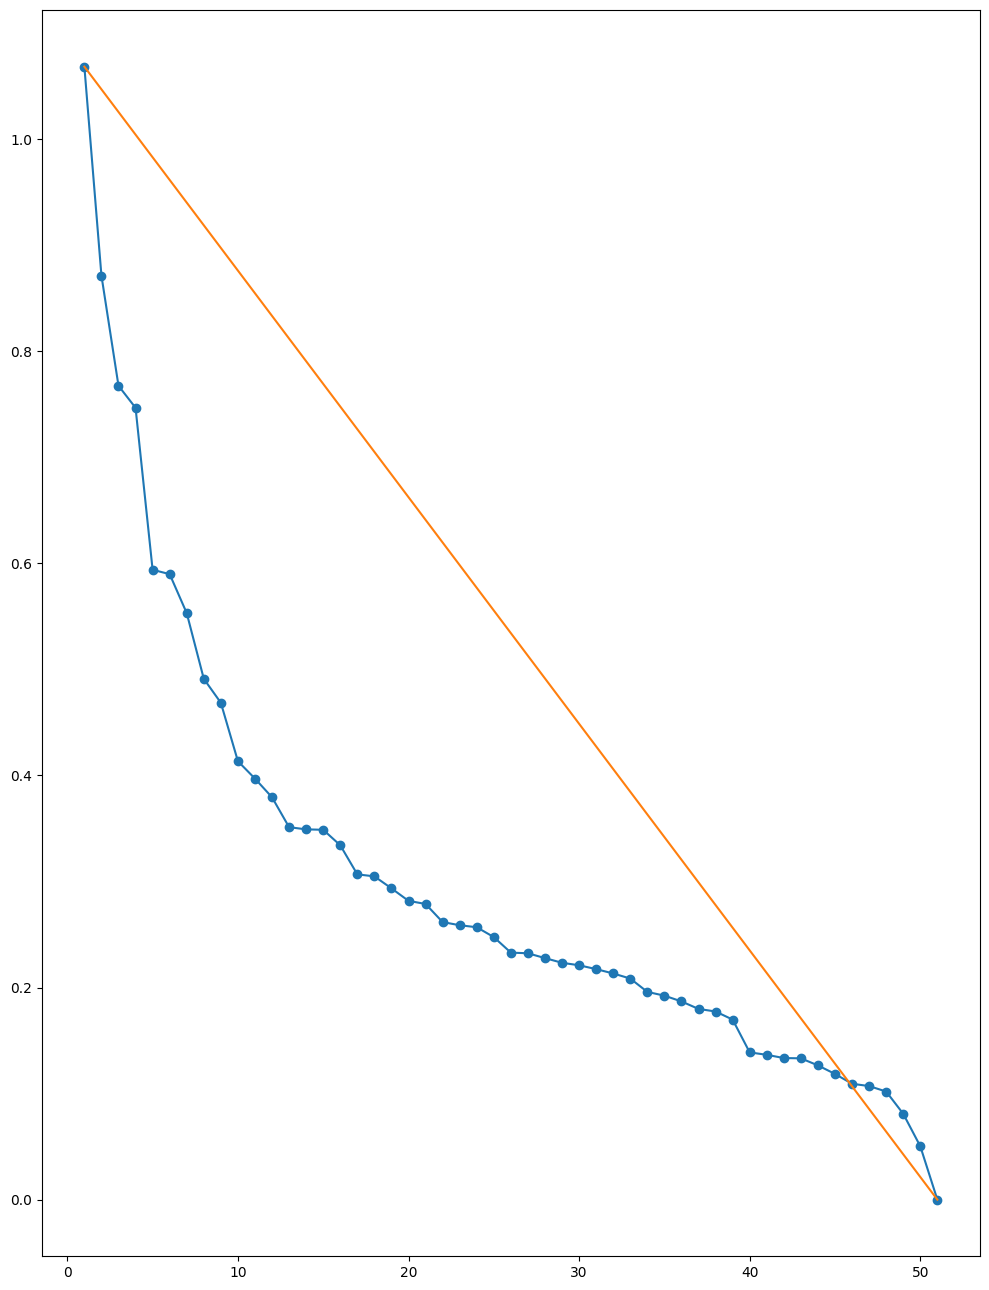

{10: 26, 5: 17, 2: 3, 13: 2, 1: 1, 3: 1}

In [10]:
nb_alphabets = len(alphabets) 

inertia = list(Z[::-1, 2])[:nb_alphabets-1] 
inertia.append(0)

fig, axes = plt.subplots(1, 1)
plt.scatter(range(1, nb_alphabets+1), inertia)
axes.plot(range(1, nb_alphabets+1), inertia) 
axes.plot([1, nb_alphabets],[inertia[0], inertia[nb_alphabets-1]]) 
plt.rcParams["figure.figsize"] = [15,5]
plt.rcParams["figure.autolayout"] = True
plt.show()

def find_distance(p1, p2, p3):
    nom = abs((p2[0]-p1[0])*(p1[1]-p3[1])-(p1[0]-p3[0])*(p2[1]-p1[1]))
    denom = math.sqrt((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)
    return nom/denom

def elbow_point(inert):
    p1=(1, inert[0])
    p2=(len(inert), inert[len(inert)-1]) 
    maxval = 0
    maxindice = 1 
    for i in range(1,len(inert)+1):
        p3=(i,inert[i-1])
        if find_distance(p1, p2, p3) > maxval: 
            maxval = find_distance(p1, p2, p3)
            maxindice = i 
    return maxindice

max_list = []
for temp in range(2, nb_alphabets+1): 
    max_list.append(elbow_point(inertia[:temp])) 

(unique, counts) = np.unique(max_list, return_counts=True)
max_dict = {x:y for x,y in zip(unique, counts)}
max_dict = dict(sorted(max_dict.items(), key=lambda item: item[1], reverse=True))
max_dict

- Clustering

In [11]:
nb_clus = 10

clusters=fcluster(Z, nb_clus, criterion='maxclust')
clusters=clusters.tolist()
dict_clusters={}
for i in range(1,nb_clus+1):
    dict_clusters[i]=[]
for i in range(len(clusters)):
    dict_clusters[clusters[i]].append(i)

list_clusters=[0]*len(alphabets)
for i in dict_clusters:
    for j in dict_clusters[i]:
        list_clusters[j]="C"+str(i) 
        
for i in dict_clusters:
    print("cluster", i, [alphabets_short[j] for j in dict_clusters[i]], len([alphabets_short[j] for j in dict_clusters[i]]))

cluster 1 ['Carian', 'Coptic', 'Cyrillic', 'Gothic', 'Greek', 'Latin', 'Lycian', 'Old Italic', 'Tifinagh'] 9
cluster 2 ['Armenian', 'Georgian Asomtavruli', 'Georgian Mkhedruli'] 3
cluster 3 ['Glagolitic'] 1
cluster 4 ['Cypriot', 'Cypro-Minoan', 'Linear B'] 3
cluster 5 ['Avestan', 'Ogham', 'Old Permic'] 3
cluster 6 ['Caucasian Albanian', 'Chorasmian', 'Hatran Aramaic', 'Hebrew', 'Imperial Aramaic', 'Kharoshthi', 'Lydian', 'Nabataean', 'Palmyrene', 'Parthian Inscriptional', 'Phoenician', 'Syriac', 'Ugaritic'] 13
cluster 7 ['Elder Futhark', 'Ge`ez', 'Old Hungarian', 'Old North Arabian', 'Old South Arabian', 'Old Turkic Orkhon', 'Old Turkic Yenisei'] 7
cluster 8 ['Arabic', 'Elymaic', 'Mandaic', 'Manichaean', 'Meroitic Cursive', 'Old Sogdian', 'Pahlavi Inscriptional', 'Pahlavi Psalter', 'Samaritan', 'Sogdian'] 10
cluster 9 ['Meroitic Hieroglyphs'] 1
cluster 10 ['Old Persian'] 1


- Dunn

In [12]:
def dist_intra_in_cluster(dict_dist, C):
    dist_max = 0
    for i in C:
        for j in C:
            if i != j:
                dist_max = max(dist_max,dict_dist[(tuple(sorted((i,j))))])
    return dist_max

def dist_inter(dict_dist, C1, C2):
    temp = []
    for i in C1:
        for j in C2:
            temp.append(dict_dist[tuple(sorted((i,j)))])
    return max(temp) 

def dist_intra_in_cluster2(dict_dist, C):
    if len(C) == 1: return 0 
    dist_tmp = []
    for i in range(len(C)-1):
        for j in range(i+1, len(C)):
            dist_tmp.append(dict_dist[(tuple(sorted((C[i],C[j]))))])
    return np.mean(dist_tmp)

def dist_inter2(dict_dist, C1, C2):
    temp = []
    for i in C1:
        for j in C2:
            temp.append(dict_dist[tuple(sorted((i,j)))])
    return np.mean(temp) 

def Dunn(dict_dist, dict_clusters):
    temp1 = []
    for i in dict_clusters:
        for j in dict_clusters:
            if i!=j:
                temp1.append(dist_inter2(dict_dist, dict_clusters[i], dict_clusters[j]))
    temp2 = []
    for i in dict_clusters:
        temp2.append(dist_intra_in_cluster2(dict_dist, dict_clusters[i]))
    SD = min(temp1)/max(temp2) 
    return SD

print(Dunn(dict_dist,dict_clusters))

0.8106029048433923


- Visualisation

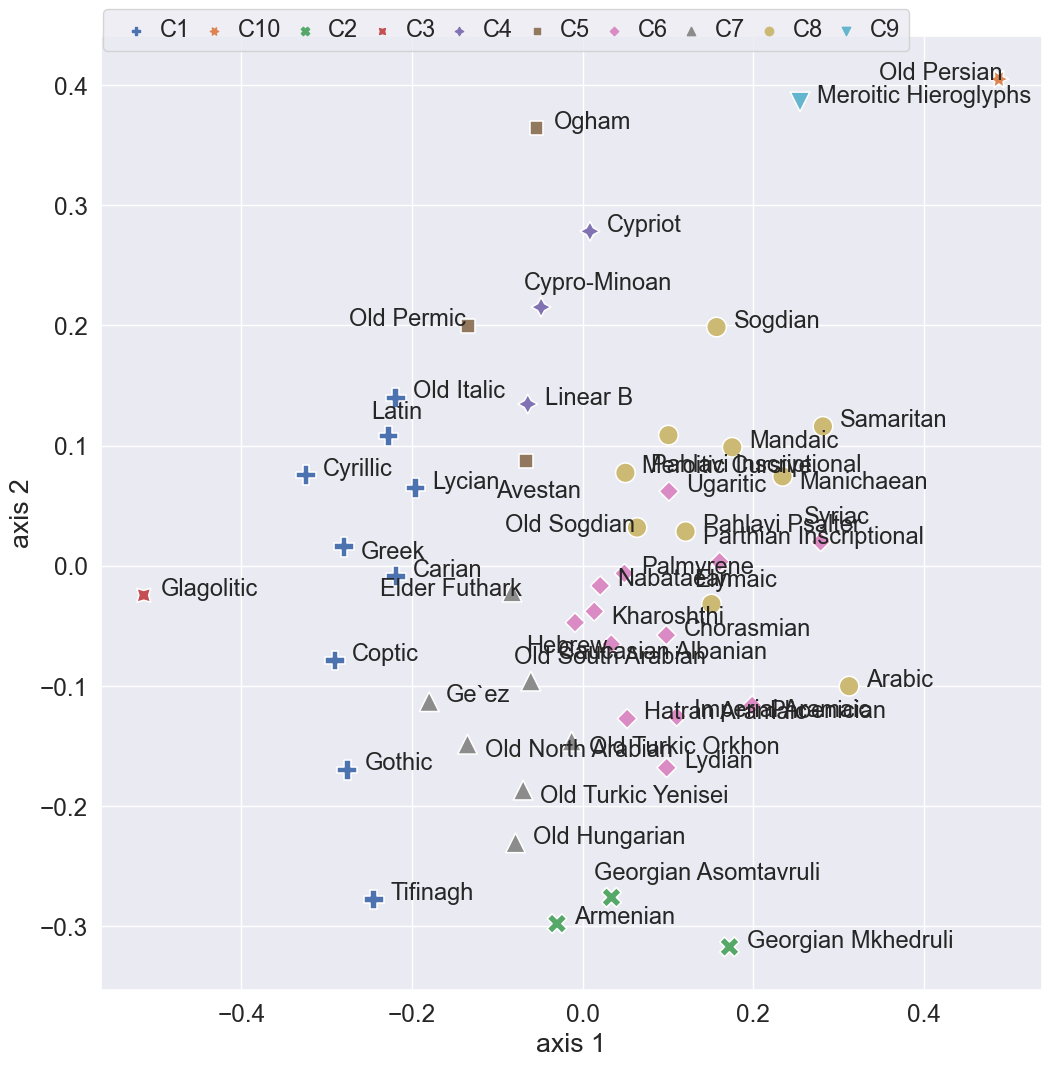

In [13]:
mat_dist = np.zeros((len(alphabets),len(alphabets)))
for i in range(len(alphabets)):
    for j in range(len(alphabets)):
        if i != j:
            mat_dist[i][j] = dict_dist[tuple(sorted((i,j)))]
            
mds = MDS(dissimilarity='precomputed', random_state=0, n_components=2, metric=True, normalized_stress=False)
mat_dist_MDS_2 = mds.fit_transform(mat_dist)

mat_dist_MDS_2_df = pd.DataFrame(data = {
    "axis 1": mat_dist_MDS_2[:,0],
    "axis 2": mat_dist_MDS_2[:,1],
    "alphabets": alphabets_short,
    "Clusters": list_clusters
})

#sns.set_palette(sns.color_palette('husl', 10))
#sns.palplot(sns.color_palette('husl', 10))

orders=list(set(list_clusters))
orders.sort() 

palette = {
    'C1': 'tab:orange',
    'C2': 'tab:green',
    'C3': 'tab:blue',
    'C4': 'tab:red',
    'C5': 'tab:purple',
    'C6': 'tab:brown',
    'C7': 'tab:pink',
    'C8': 'tab:grey',
    'C9': 'tab:blue'
}

sns.set(rc={"figure.figsize":(11,11)}, font_scale=1.6) 
s = sns.scatterplot(x='axis 1', y='axis 2', data=mat_dist_MDS_2_df, hue='Clusters', s=200, style='Clusters', hue_order=orders) #palette=palette
s.legend(loc='upper left', bbox_to_anchor=(-0.01,1.04), ncol=10, columnspacing=0.001, fontsize=17, handletextpad=0) 
offset = 0.02
for i in range(0, len(mat_dist_MDS_2)):
    if alphabets_short[i] in ["Latin", "Syriac", "Parthian Inscriptional", "Elymaic", "Old South Arabian", "Cypro-Minoan", "Georgian Asomtavruli"]: 
        offset_x = -0.02  
        offset_y = 0.015 
    elif alphabets_short[i] in ["Pahlavi Inscriptional", "Caucasian Albanian"]: 
        offset_x = - 0.02  
        offset_y = -0.03
    elif alphabets_short[i] in ["Avestan"]: 
        offset_x = - 0.035 
        offset_y = -0.03 
    elif alphabets_short[i] in ["Kharoshthi", "Old Turkic Yenisei", "Old Turkic Orkhon", "Old North Arabian", "Manichaean", "Greek", "Phoenician"]: 
        offset_x = 0.02
        offset_y = - 0.01  
    elif alphabets_short[i] in ["Old Permic", "Old Persian"]:  
        offset_x = - 0.14     
        offset_y = 0
    elif alphabets_short[i] in ["Hebrew"]: 
        offset_x = - 0.1    
        offset_y = -0.007  
    elif alphabets_short[i] in ["Elder Futhark", "Old Sogdian"]: 
        offset_x = - 0.155  
        offset_y = -0.003 
    else:
        offset_x = 0.02 
        offset_y = 0 
    plt.text(mat_dist_MDS_2_df["axis 1"][i] + offset_x, mat_dist_MDS_2_df["axis 2"][i] + offset_y, f'{alphabets_short[i]}', fontsize=17) 
    
plt.show()

- Cluster medoids

In [14]:
def medoid(C):
    list_temp = []
    for i in C:
        temp = 0
        for j in C:
            if i != j:
                temp += dict_dist[tuple(sorted((i,j)))]
        list_temp.append(temp)
    return C[np.argmin(list_temp)]

def diameter(C):
    if len(C) == 1: return 0 
    temp = []
    for i in range(len(C)-1):
        for j in range(i+1,len(C)):
            temp.append(dict_dist[(C[i],C[j])])
    return max(temp)

def dist_mean(C):
    if len(C) == 1: return 0 
    temp = []
    for i in range(len(C)-1):
        for j in range(i+1,len(C)):
            temp.append(dict_dist[(C[i],C[j])])
    return np.mean(temp)

list_size = []
list_medoid = []
list_diameter = []
list_mean_dist = []
list_cluster_num = []
for key in dict_clusters:
    list_cluster_num.append("C"+str(key))
    list_size.append(len(dict_clusters[key]))
    list_medoid.append(alphabets_short[medoid(dict_clusters[key])])
    list_diameter.append(diameter(dict_clusters[key])) 
    list_mean_dist.append(dist_mean(dict_clusters[key])) 

df = pd.DataFrame({
    "Cluster": list_cluster_num,
    "Size": list_size,
    "Medoid": list_medoid,
    "Diameter": list_diameter,
    "Mean distance": list_mean_dist
    })

df

,Cluster,Size,Medoid,Diameter,Mean distance
0,C1,9,Greek,0.408760,0.279205
1,C2,3,Georgian Asomtavruli,0.277124,0.252648
2,C3,1,Glagolitic,0.000000,0.000000
3,C4,3,Cypro-Minoan,0.294029,0.257126
4,C5,3,Avestan,0.431947,0.308498
5,C6,13,Nabataean,0.403909,0.185337
6,C7,7,Old South Arabian,0.339082,0.228937
7,C8,10,Pahlavi Psalter,0.432957,0.211760
8,C9,1,Meroitic Hieroglyphs,0.000000,0.000000
9,C10,1,Old Persian,0.000000,0.000000
